<a href="https://colab.research.google.com/github/pavan9948/boustonhousepricing/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 13 kB/s 
     |████████████████████████████████| 1.7 MB 40.1 MB/s 
     |████████████████████████████████| 438 kB 47.4 MB/s 
     |████████████████████████████████| 5.9 MB 31.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
X=df.iloc[:,3:13]
y=df.iloc[:,13]

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


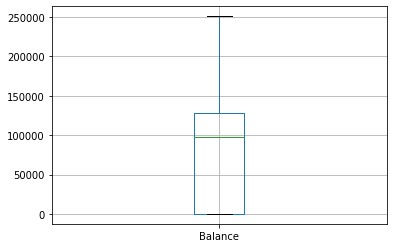

In [12]:
X.boxplot(column='Balance',by=None,grid=True,figsize=None)

In [14]:
y.boxplot(column='Exited',by=None)

AttributeError: ignored

KeyError: ignored

In [45]:
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


KeyError: ignored

In [17]:
# concatenate variables with dataframe

In [46]:
X=X.drop(['Geography','Gender'],axis=1)

KeyError: ignored

In [20]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [47]:
X= pd.concat([X,geography,gender],axis=1)

In [48]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0


In [49]:
from pandas.core.common import random_state
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=10,random_state=100)


In [50]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
7904,449,32,0,155619.36,1,1,1,166692.03,0,1,1,0,1,1
4322,508,31,8,72541.48,1,1,0,129803.08,0,0,1,0,0,1
770,742,36,2,129748.54,2,0,0,47271.61,1,0,0,1,0,0
8272,753,32,5,159904.79,1,1,0,148811.14,1,0,1,1,0,1
540,833,37,8,151226.18,2,1,1,136129.49,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,659,32,3,107594.11,2,1,1,102416.84,0,1,1,0,1,1
79,416,41,10,122189.66,2,1,0,98301.61,1,0,0,1,0,0
8039,672,43,4,92599.55,2,1,1,167336.78,0,0,0,0,0,0
6936,592,31,2,84102.11,2,0,1,116385.24,0,0,0,0,0,0


In [51]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
8018,632,23,3,122478.51,1,1,0,147230.77,1,0,1,1,0,1
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0,1,0,0
3854,687,33,9,135962.40,2,1,0,121747.96,1,0,1,1,0,1
2029,520,33,4,156297.58,2,1,1,166102.61,0,0,1,0,0,1
3539,667,42,6,0.00,1,1,0,88890.05,0,0,1,0,0,1
1942,684,45,6,148071.39,1,1,0,183575.01,0,0,1,0,0,1
1250,548,32,5,175214.71,1,1,1,155165.61,1,0,1,1,0,1
2817,538,30,8,0.00,2,1,1,41192.95,0,1,0,0,1,0
4211,792,47,0,0.00,1,1,1,5557.88,0,1,1,0,1,1
477,611,40,8,100812.33,2,1,0,147358.27,0,0,0,0,0,0


In [35]:
y_train

7904    0
4322    0
770     1
8272    0
540     0
       ..
350     0
79      0
8039    0
6936    0
5640    1
Name: Exited, Length: 9990, dtype: int64

In [36]:
y_test

8018    1
9225    0
3854    0
2029    0
3539    0
1942    0
1250    0
2817    0
4211    1
477     0
Name: Exited, dtype: int64

In [37]:
# feature scaling

In [59]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [60]:
X_train

array([[-2.08513063, -0.66017946, -1.73304277, ..., -0.57850613,
         1.74251647,  0.91270341],
       [-1.47475378, -0.75551189,  1.03290388, ..., -0.57850613,
        -0.57388267,  0.91270341],
       [ 0.94606289, -0.27884974, -1.04155611, ...,  1.72859016,
        -0.57388267, -1.09564617],
       ...,
       [ 0.22188697,  0.38847727, -0.35006945, ..., -0.57850613,
        -0.57388267, -1.09564617],
       [-0.60574267, -0.75551189, -1.04155611, ..., -0.57850613,
        -0.57388267, -1.09564617],
       [-1.79546026, -1.4228389 , -1.04155611, ...,  1.72859016,
        -0.57388267, -1.09564617]])

In [61]:
X_test

array([[-0.19192785, -1.51817133, -0.69581278,  0.73751601, -0.91151764,
         0.64655005, -1.0307013 ,  0.82014126,  1.72859016, -0.57388267,
         0.91270341,  1.72859016, -0.57388267,  0.91270341],
       [-0.58505192, -0.66017946, -0.35006945,  0.69899025,  0.8075802 ,
         0.64655005,  0.97021319,  1.09369917,  1.72859016, -0.57388267,
        -1.09564617,  1.72859016, -0.57388267, -1.09564617],
       [ 0.37706752, -0.56484703,  1.37864721,  0.95364604,  0.8075802 ,
         0.64655005, -1.0307013 ,  0.37700253,  1.72859016, -0.57388267,
         0.91270341,  1.72859016, -0.57388267,  0.91270341],
       [-1.35060933, -0.56484703, -0.35006945,  1.27959375,  0.8075802 ,
         0.64655005,  0.97021319,  1.14831713, -0.57850613, -0.57388267,
         0.91270341, -0.57850613, -0.57388267,  0.91270341],
       [ 0.17016011,  0.29314484,  0.34141721, -1.22566257, -0.91151764,
         0.64655005, -1.0307013 , -0.19438707, -0.57850613, -0.57388267,
         0.91270341, -0.57

In [62]:
X_train.shape

(9990, 14)

In [63]:
X_test.shape

(10, 14)

In [64]:
#ANN

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [66]:
#intailize ANN

In [67]:
classifier=Sequential()

In [68]:
#adding  input layer

In [69]:
classifier.add(Dense(units=14,activation='relu'))


In [70]:
#hl1

In [71]:
classifier.add(Dense(units=8,activation='relu'))


In [72]:
#hl2

In [73]:
classifier.add(Dense(units=5,activation='relu'))

In [78]:
classifier.add(Dense(1,activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=.01)
model_history=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=100)

Epoch 1/1000
670/670 [==============================] - 3s 4ms/step - loss: 0.6491 - accuracy: 0.6886 - val_loss: 0.5765 - val_accuracy: 0.7907
Epoch 2/1000
670/670 [==============================] - 2s 3ms/step - loss: 0.5449 - accuracy: 0.7990 - val_loss: 0.5323 - val_accuracy: 0.7907
Epoch 3/1000
670/670 [==============================] - 2s 3ms/step - loss: 0.5091 - accuracy: 0.8017 - val_loss: 0.4941 - val_accuracy: 0.7992
Epoch 4/1000
670/670 [==============================] - 2s 3ms/step - loss: 0.4673 - accuracy: 0.8189 - val_loss: 0.4653 - val_accuracy: 0.8132
Epoch 5/1000
670/670 [==============================] - 2s 3ms/step - loss: 0.4462 - accuracy: 0.8241 - val_loss: 0.4520 - val_accuracy: 0.8195
Epoch 6/1000
670/670 [==============================] - 2s 3ms/step - loss: 0.4321 - accuracy: 0.8277 - val_loss: 0.4403 - val_accuracy: 0.8226
Epoch 7/1000
670/670 [==============================] - 2s 3ms/step - loss: 0.4207 - accuracy: 0.8346 - val_loss: 0.4328 - val_accuracy:

KeyboardInterrupt: ignored

In [74]:
#output layer

In [ ]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=.01)
model_history=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=100)

In [84]:
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)
model_history=classifier.fit(X_train,y_train,validation_split=.33,batch_size=10,epochs=100,callbacks=early_stopping)

Epoch 1/100
670/670 [==============================] - 2s 4ms/step - loss: 0.3100 - accuracy: 0.8770 - val_loss: 0.3594 - val_accuracy: 0.8565
Epoch 2/100
670/670 [==============================] - 2s 4ms/step - loss: 0.3086 - accuracy: 0.8760 - val_loss: 0.3576 - val_accuracy: 0.8538
Epoch 3/100
670/670 [==============================] - 2s 3ms/step - loss: 0.3094 - accuracy: 0.8761 - val_loss: 0.3575 - val_accuracy: 0.8553
Epoch 4/100
670/670 [==============================] - 2s 3ms/step - loss: 0.3084 - accuracy: 0.8766 - val_loss: 0.3588 - val_accuracy: 0.8584
Epoch 5/100
670/670 [==============================] - 3s 4ms/step - loss: 0.3090 - accuracy: 0.8752 - val_loss: 0.3631 - val_accuracy: 0.8590
Epoch 6/100
670/670 [==============================] - 2s 3ms/step - loss: 0.3092 - accuracy: 0.8751 - val_loss: 0.3604 - val_accuracy: 0.8499
Epoch 7/100
670/670 [==============================] - 2s 3ms/step - loss: 0.3088 - accuracy: 0.8746 - val_loss: 0.3608 - val_accuracy: 0.8574

In [85]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

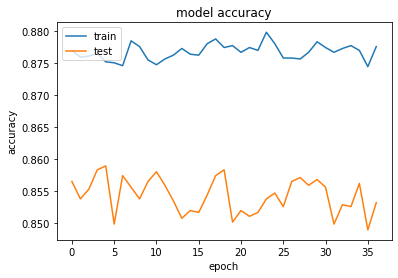

In [86]:
#summaryplot
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

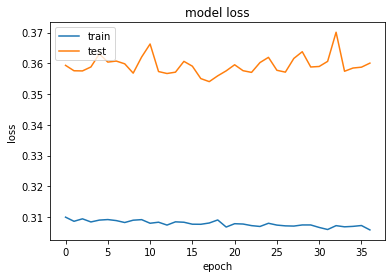

In [87]:
#summaryplot
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [88]:
#predicting test results

In [89]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=.5)

1/1 [==============================] - 0s 127ms/step


In [90]:
#confusion matrix

In [91]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[8, 0],
       [2, 0]])

In [92]:
#calculate the accuracy

In [93]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8

In [95]:
classifier.get_weights()

[array([[ 0.63855076, -0.14474028, -0.4011993 ,  0.7376921 ,  0.35501987,
          0.45526588,  0.0159867 ,  0.6500093 ,  0.19040409,  0.28936666,
          0.19465145,  0.063399  ,  0.536197  , -0.3798666 ],
        [ 0.00710853, -0.03773917, -0.9368912 , -0.6914886 , -0.25115007,
         -0.32821232,  0.07495084,  0.36343583, -1.3978407 , -1.5255346 ,
         -0.30358008, -1.0789444 ,  0.58938605,  0.29962343],
        [ 0.21230082,  0.02099846, -0.28987718,  0.9779563 ,  0.11581025,
         -0.10168093, -0.06116132,  0.20947243, -0.19448438,  0.19151147,
         -0.20357901, -0.03875321,  0.10174087,  0.72145516],
        [ 0.1227118 , -0.6144854 , -0.55705214, -0.21329135, -0.9135387 ,
          0.3213062 , -0.14488466, -0.48171037, -0.33439958,  0.02323464,
          1.607263  , -0.05137008, -0.35423222, -0.09366509],
        [-0.24438515,  0.22131523,  0.15795423, -0.9837382 , -1.307344  ,
          1.9746251 , -1.3495055 ,  1.0741891 ,  1.0601838 , -0.59534997,
          0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')